# Tarea 2

Con base en la tabla de datos mostrada en la diapositiva 4 de la presentación Introducción a la Visualización, realizar lo siguiente:

1. Encontrar el valor atípico y explicar por qué se considera un valor extraño.

El valor que puede considerarse atípico es el de la primera fila (debajo de las columnas) que indica que el proceso 1 toma tiempo de 29278 segundos, ya que es una observación que numéricamente es muy distante al resto de los datos, es decir, está muy alejado de los demás datos. 

2. Crear un archivo de esos datos en el formato CSV y leerlo en un Dataframe de Pandas.

Creamos el archivo y lo leemos:

In [1]:
import pandas as pd

datos = pd.read_csv("Tarea2.csv")
datos.head(6)

,Proc.,Time [s]
0,1,29278
1,16,178
2,25,78
3,64,16
4,256,2
5,400,1


In [2]:
print(type(datos))

<class 'pandas.core.frame.DataFrame'>


3. Completar las columnas de Speedup, Efficiency y Cost usando las fórmulas mostradas en la diapositiva 6, tanto para el caso absoluto como para el caso relativo con p' = 16. Agregar estos datos al dataframe antes creado y realizar los gráficos correspondientes usando Matplotlib.

In [3]:
datos['Speedup'] = datos['Time [s]'][0]/datos['Time [s]']
datos['Efficiency'] = datos['Speedup'] / datos['Proc.']
datos['Cost'] = datos['Proc.'] * datos['Time [s]']

p_prima = 16
datos['Rel Speedup'] = 178/datos['Time [s]']
datos['Rel Efficiency'] = p_prima * datos['Rel Speedup'] / datos['Proc.']
datos['Rel Speedup Max'] = datos['Proc.'] / p_prima

In [4]:
datos.head(6)

,Proc.,Time [s],Speedup,Efficiency,Cost,Rel Speedup,Rel Efficiency,Rel Speedup Max
0,1,29278,1.000000,1.000000,29278,0.006080,0.097274,0.0625
1,16,178,164.483146,10.280197,2848,1.000000,1.000000,1.0000
2,25,78,375.358974,15.014359,1950,2.282051,1.460513,1.5625
3,64,16,1829.875000,28.591797,1024,11.125000,2.781250,4.0000
4,256,2,14639.000000,57.183594,512,89.000000,5.562500,16.0000
5,400,1,29278.000000,73.195000,400,178.000000,7.120000,25.0000


## Análisis absoluto

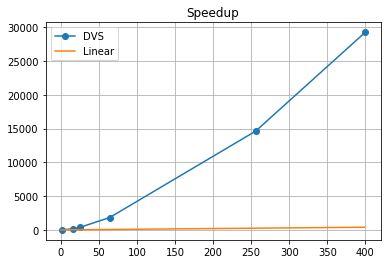

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,400,1)

plt.plot(datos['Proc.'], datos['Speedup'], 'o-', x,  '-')
plt.title('Speedup')
plt.legend(('DVS', 'Linear'),loc='upper left')
plt.grid()
plt.show()

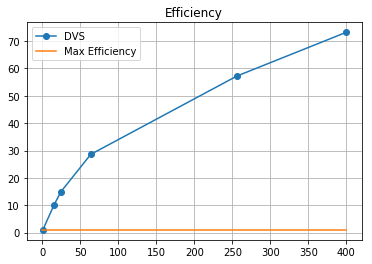

In [7]:
y = []
for i in range(400):
    y.append(1)
plt.plot(datos['Proc.'], datos['Efficiency'], 'o-', x,y, '-')
plt.title('Efficiency')
plt.legend(('DVS', 'Max Efficiency'),loc='upper left')
plt.grid()
plt.show()

In [8]:
#plt.plot(datos['Proc.'], datos['Cost'], 'o-')
#plt.title('Cost')
#plt.show()

## Análisis relativo

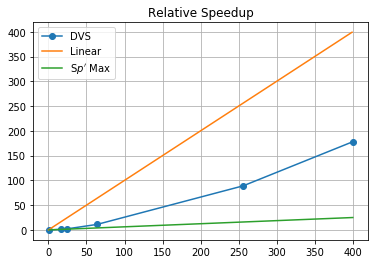

In [9]:
plt.plot(datos['Proc.'], datos['Rel Speedup'], 'o-', x,  '-', datos['Proc.'], datos['Rel Speedup Max'], '-')
plt.title('Relative Speedup')
plt.legend(('DVS', 'Linear', 'S$p\'$ Max'),loc='upper left')
plt.grid()
plt.show()

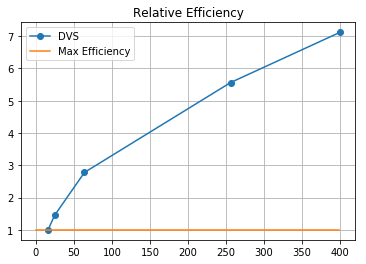

In [11]:
plt.plot(datos['Proc.'][1:6], datos['Rel Efficiency'][1:6], 'o-',x,y, '-')
plt.title('Relative Efficiency')
plt.legend(('DVS', 'Max Efficiency'),loc='upper left')
plt.grid()
plt.show()

4. Generar información similar al punto 2, sustituyendo el valor atípico por el valor mostrado en la diapositiva 9.  Agregar estos datos al dataframe antes creado y realizar los gráficos correspondientes usando Matplotlib.

In [12]:
# Sustituyemos el valor atípico por Time = 430 [s], con 1 procesador.
datos['Time [s]'][0] = 430

/home/jodejetalo99/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
datos['Speedup'] = datos['Time [s]'][0]/datos['Time [s]']
datos['Efficiency'] = datos['Speedup'] / datos['Proc.']
datos['Cost'] = datos['Proc.'] * datos['Time [s]']

p_prima = 16
datos['Rel Speedup'] = 178/datos['Time [s]']
datos['Rel Efficiency'] = p_prima * datos['Rel Speedup'] / datos['Proc.']
datos['Rel Speedup Max'] = datos['Proc.'] / p_prima

In [14]:
# Verificamos que se haya modificado en el data frame
datos.head(6)

,Proc.,Time [s],Speedup,Efficiency,Cost,Rel Speedup,Rel Efficiency,Rel Speedup Max
0,1,430,1.000000,1.000000,430,0.413953,6.623256,0.0625
1,16,178,2.415730,0.150983,2848,1.000000,1.000000,1.0000
2,25,78,5.512821,0.220513,1950,2.282051,1.460513,1.5625
3,64,16,26.875000,0.419922,1024,11.125000,2.781250,4.0000
4,256,2,215.000000,0.839844,512,89.000000,5.562500,16.0000
5,400,1,430.000000,1.075000,400,178.000000,7.120000,25.0000


Realizamos las gráficas correspondientes:

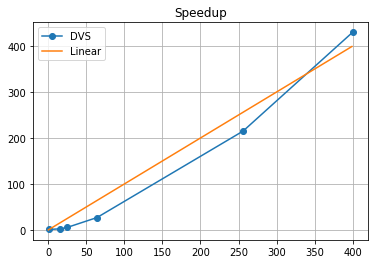

In [15]:
plt.plot(datos['Proc.'], datos['Speedup'], 'o-', x,  '-')
plt.title('Speedup')
plt.legend(('DVS', 'Linear'),loc='upper left')
plt.grid()
plt.show()

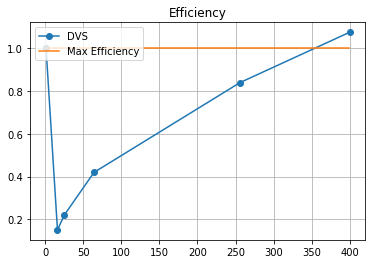

In [16]:
# Revisar Max Efficiency
plt.plot(datos['Proc.'], datos['Efficiency'], 'o-', x, y, '-')
plt.title('Efficiency')
plt.legend(('DVS', 'Max Efficiency'),loc='upper left')
plt.grid()
plt.show()

5. Contar la historia del análisis de esta información usando gráficos que resalten lo realizado en los incisos 2 y 3.

<div style="text-align: justify">  Notamos que al modificar el outlier las gráficas se ven mejor, pues al comparar la velocidad con la función identidad, podemos notar que ambas no están tan despegadas como se veía anteriormente. De igual manera, al compara la eficiencia con la máxima eficiencia, obsvervamos que las dos se encuentran en el rectángulo R = [0,400]x[0,1] y visualmente se pueden comparar. Por lo tanto, es importante identificar valores atípicos; en clase con la tabla inicial no veíamos nada raro, sin embargo, cuando el profesor mostró las gráficas pudimos observar un outlier. Así, es de suma importancia visualizar la información, ya que de esta manera podemos inferir un poco sobre la calidad de los datos, que en este caso es de que tenga sentido la comparabilidad.</div>

6. Leer el artículo: Francis Anscombe, (1973). "Graphs in Statistical Analysis". American Statistician. 27 (1): 17–21. doi:10.1080/00031305.1973.10478966. JSTOR 2682899. (LINK LOCAL). Poner especial atención a la sección: 3. An example.